Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,LSTM
from numpy.random import seed
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Reading Data from the file

In [2]:
data=pd.read_excel("admission.xlsx")

Transform Data

In [3]:
df=pd.DataFrame({'Disease':[],'Month':[],"Total  patients":[],"Discharged":[],"Died":[]})
diseases=data['Diseases'].drop(index=0).dropna()
for i in range(1,data.columns.size,3):
    v=data[data.columns[i:i+3]].dropna()
    month=data.columns[i]
    v.columns=v.iloc[0]
    v.drop(index=0,inplace=True)
    v["Disease"]=diseases
    v["Month"]=[month for j in range(diseases.size)]
    df = pd.concat([df, v], ignore_index=True)


In [4]:
df['Died']=df['Died'].astype(float)
df['Total  patients']=df['Total  patients'].astype(float)
df['Discharged']=df['Discharged'].astype(float)


In [5]:
# df.to_excel("Data.xlsx",index=False)
df.size

960

In [6]:
#View Columns
df.columns

Index(['Disease', 'Month', 'Total  patients', 'Discharged', 'Died'], dtype='object')

In [7]:
# check for missing values:
df.isnull().sum()


Disease            0
Month              0
Total  patients    0
Discharged         0
Died               0
dtype: int64

In [8]:
df.nunique()

Disease             16
Month               12
Total  patients    101
Discharged          98
Died                73
dtype: int64

In [9]:
df['Died'].describe()

count    192.000000
mean      54.598958
std       94.704946
min        2.000000
25%       10.000000
50%       17.000000
75%       41.250000
max      384.000000
Name: Died, dtype: float64

Explanatory Data analysis

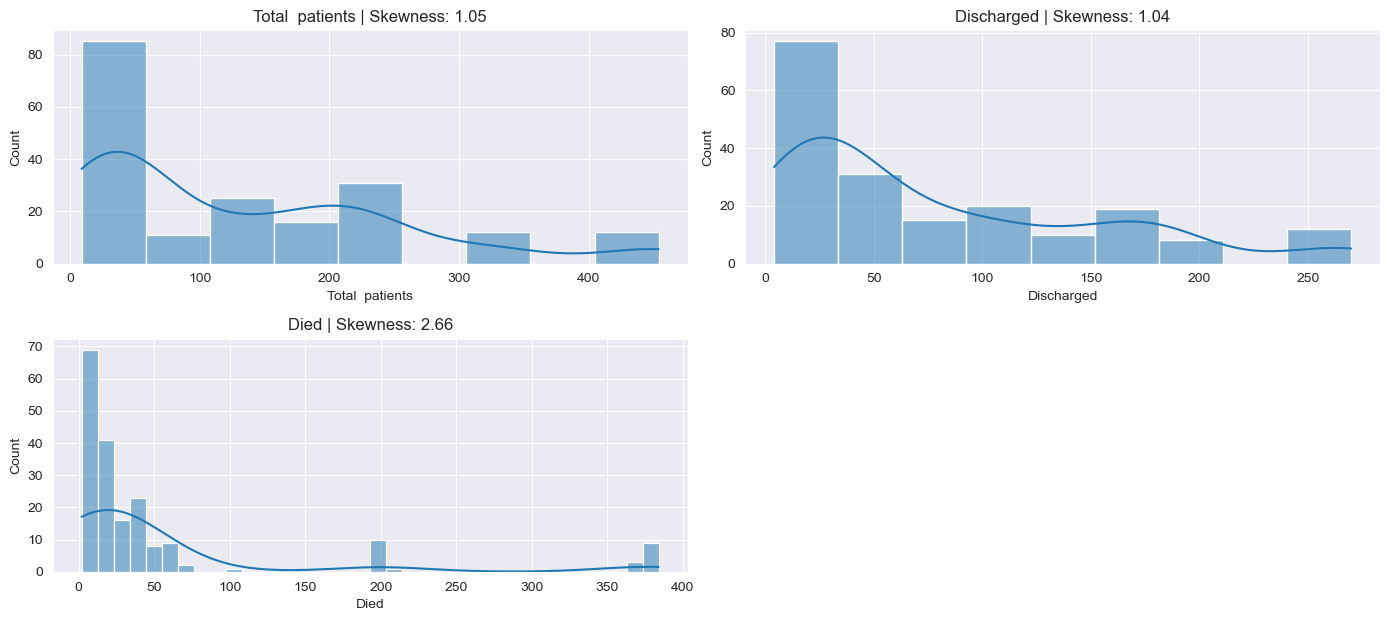

In [10]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [11]:
diseases_categories=df["Disease"].astype('category')
month_categories=df["Month"].astype('category')
df['Disease']=diseases_categories.cat.codes
df['Month'] =month_categories.cat.codes

X=df.iloc[:,:2]
Y=df.iloc[:,-3:]

In [12]:
diseases_categories.cat.categories

Index(['Cerebral palsy', 'Chest indrawing', 'Convulsions', 'Diarrhea', 'Fever',
       'Hypothermia', 'Malaria', 'Not able to complete feeds',
       'Nutritional edema', 'Reduced consciousness',
       'Refused testing/died before testing', 'Severe anemia',
       'Severe pneumonia', 'Shock', 'Symptomatic hypoglycemia', 'Vomiting'],
      dtype='object')

In [13]:
month_categories.cat.categories

Index(['April ', 'August', 'December', 'July ', 'June', 'March ', 'May',
       'November', 'October', 'Septermber', 'february', 'january'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

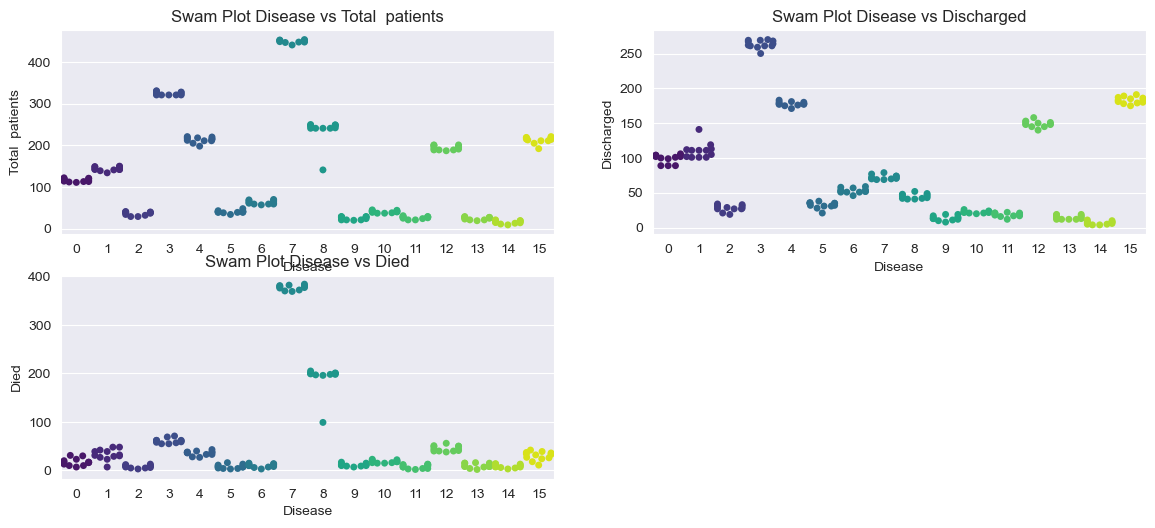

In [14]:

plt.figure(figsize=(10, 8))

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.swarmplot(x="Disease", y=feature, data=df, palette='viridis')
	plt.title(f"Swam Plot Disease vs {feature}")
	plt.xlabel('Disease')
	plt.ylabel(feature)
    
plt.show()


<Figure size 1000x800 with 0 Axes>

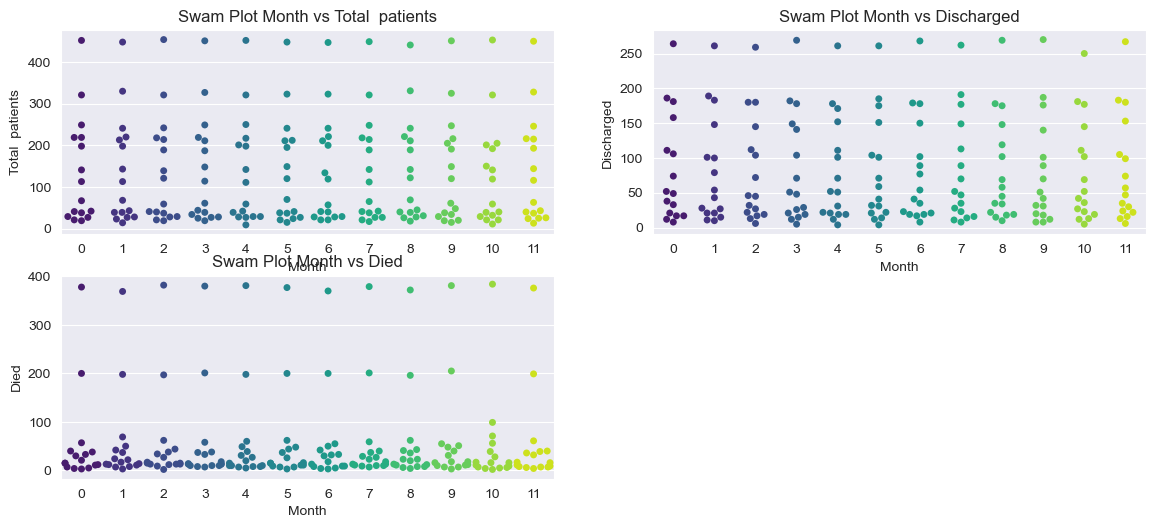

In [15]:
plt.figure(figsize=(10, 8))

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.swarmplot(x="Month", y=feature, data=df, palette='viridis')
	plt.title(f"Swam Plot Month vs {feature}")
	plt.xlabel('Month')
	plt.ylabel(feature)
    
plt.show()

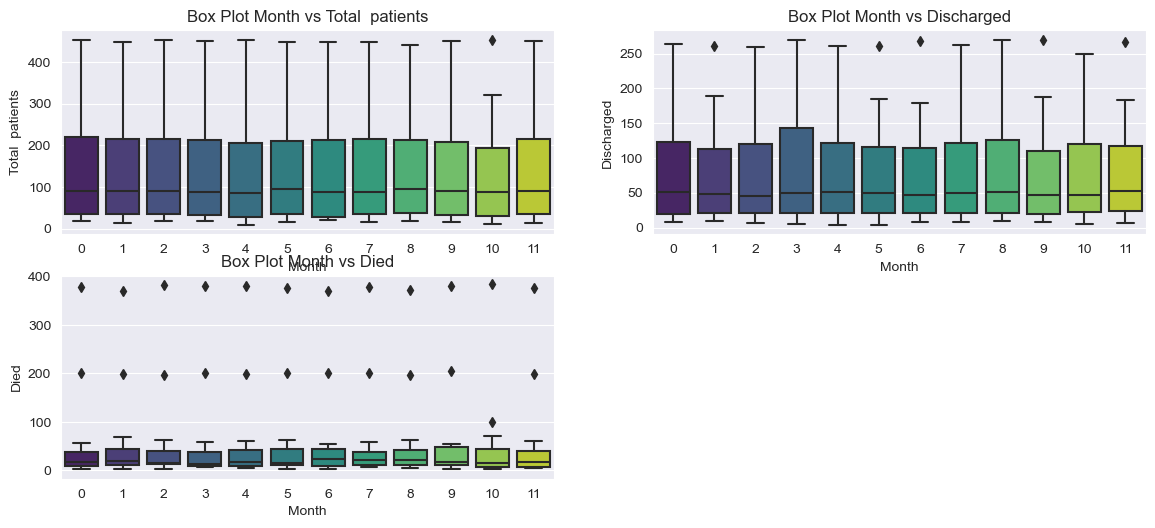

In [16]:

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.boxplot(x="Month", y=feature, data=df, palette='viridis')
	plt.title(f"Box Plot Month vs {feature}")
	plt.xlabel('Month')
	plt.ylabel(feature)
plt.show()



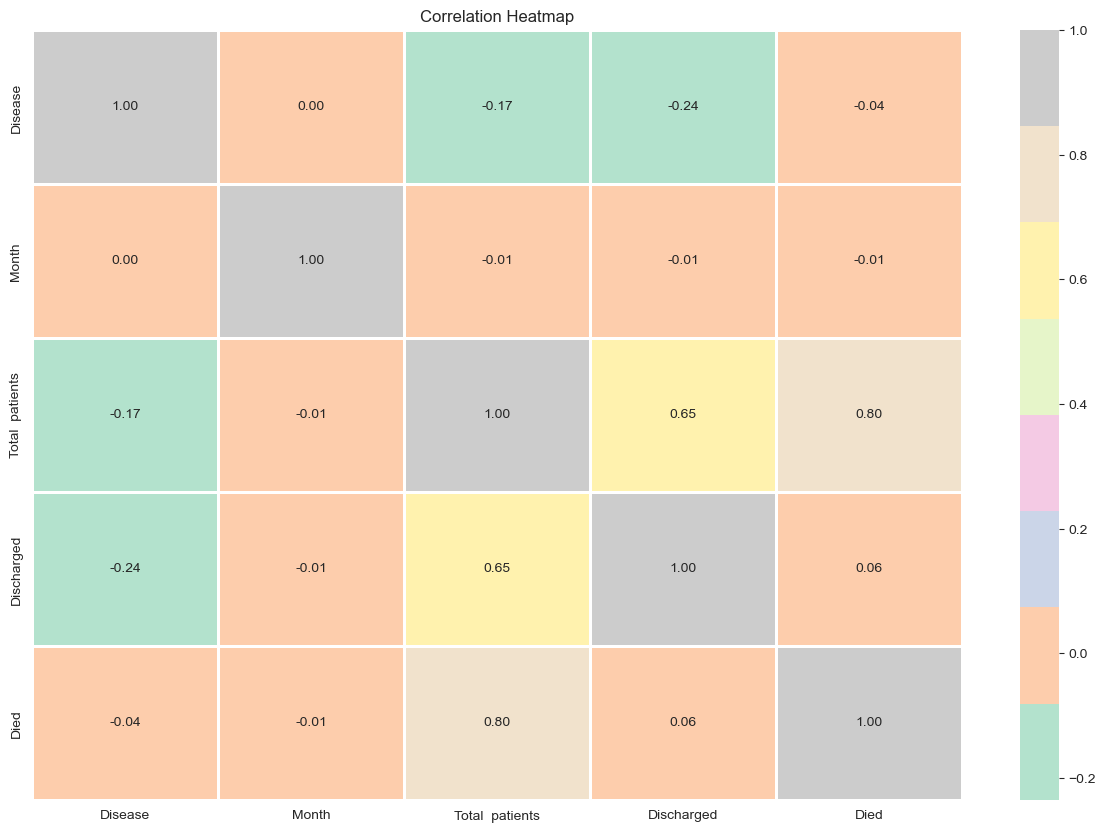

In [17]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


In [18]:
sum_per_month=df.groupby("Month").sum()
summary_per_month=df.groupby("Month").describe()

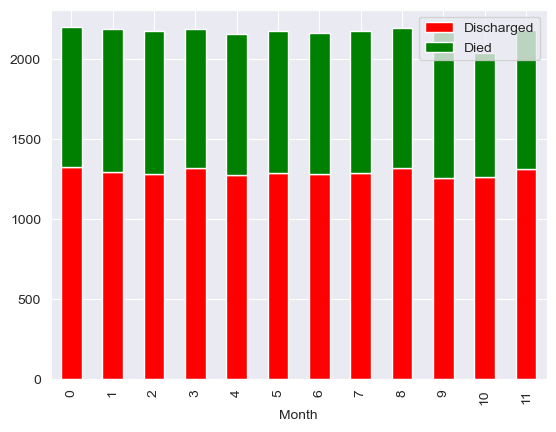

In [19]:
sum_per_month.loc[:,['Discharged', 'Died']].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.show()

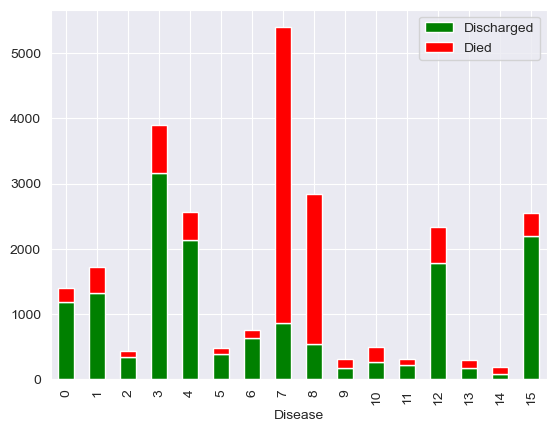

In [20]:
df.groupby("Disease").sum().loc[:,['Discharged', 'Died']].plot(kind='bar', stacked=True, color=['green', 'red'])
plt.show()

Transform data to range between 0-1 and split into train-test data

In [21]:
df.shape

(192, 5)

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
Y_Scaled= scaler.fit_transform(Y.values)

x_train,x_test,y_train,y_test=train_test_split(X,Y_Scaled,test_size=0.2,shuffle=False)


In [23]:
random_forest_model=RandomForestRegressor(n_estimators=200,criterion="poisson")
random_forest_model.fit(x_train,y_train)
random_forest_predict=random_forest_model.predict(x_test)
rf_r2= r2_score(y_test,random_forest_predict)
rf_mse=mean_squared_error(y_test,random_forest_predict)
print(f"Fandom Forest, MSE={rf_mse}, R2={rf_r2}")

Fandom Forest, MSE=0.00017431283727625387, R2=0.9976741249999169


In [24]:
random_forest_predict= pd.DataFrame(scaler.inverse_transform(random_forest_predict),columns=Y.columns)
s_y_test =  pd.DataFrame(scaler.inverse_transform(y_test),columns=Y.columns)

In [25]:
#Predicted
random_forest_predict

,Total patients,Discharged,Died
0,15.237845,7.052246,8.185599
1,44.565000,33.200000,11.365000
2,234.895000,41.995000,192.900000
3,450.210000,71.380000,378.830000
4,22.490000,11.655000,10.835000
5,20.320000,13.290000,7.030000
6,207.790000,184.780000,23.010000
7,41.150000,22.515000,18.635000
8,119.775000,93.240000,26.535000
9,196.410000,149.110000,47.300000


In [26]:
#Actual
s_y_test

,Total patients,Discharged,Died
0,18.0,10.0,8.0
1,39.0,35.0,4.0
2,241.0,45.0,196.0
3,441.0,69.0,372.0
4,28.0,15.0,13.0
5,26.0,18.0,8.0
6,211.0,175.0,36.0
7,41.0,23.0,18.0
8,112.0,89.0,23.0
9,189.0,149.0,40.0


In [27]:
Y.columns

Index(['Total  patients', 'Discharged', 'Died'], dtype='object')

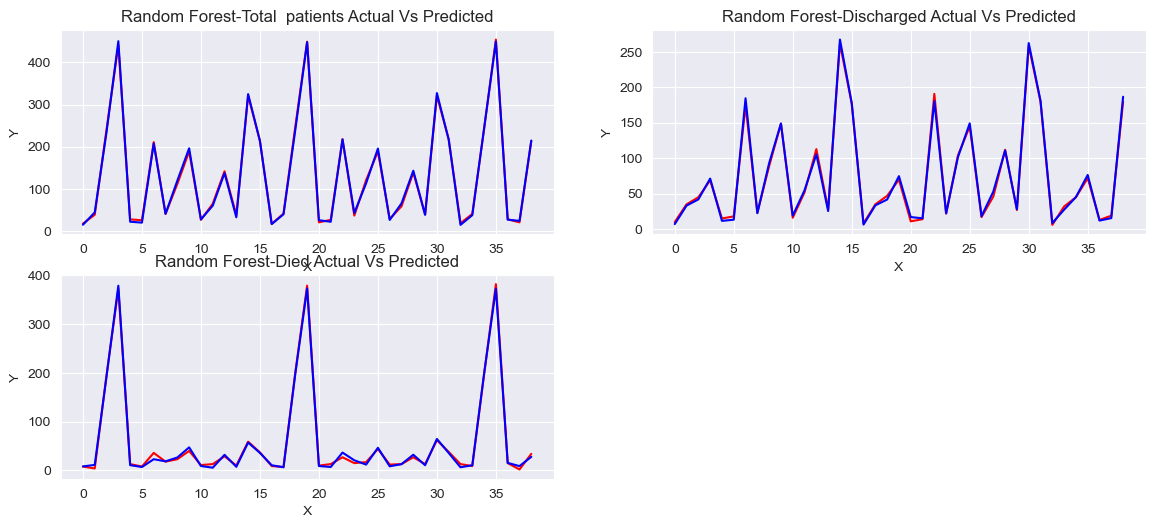

In [28]:

#plt.figure(figsize=(10, 8))
plt.figure(figsize=(14, len(Y.columns) * 3))
for idx, feature in enumerate(Y.columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    plt.plot( s_y_test[feature], label=f"Actual-{feature}", color='red')
    plt.plot(random_forest_predict[feature], label=f"Pred-{feature}", color='blue')
    plt.title(f'Random Forest-{feature} Actual Vs Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    
plt.show()

In [29]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3))
model.compile(loss="mse", optimizer="adam")

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test),verbose=False,shuffle=False)

# Make predictions
y_pred = model.predict(x_test)

# Invert scaling for actual values
y_pred= pd.DataFrame(scaler.inverse_transform(y_pred),columns=Y.columns)

neural_r2=r2_score(s_y_test,y_pred)
neural_mse=mean_squared_error(s_y_test,y_pred)
print(f"Neural Network, MSE={neural_mse}, R2={neural_r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Neural Network, MSE=1643.7919930094629, R2=0.81754321159563


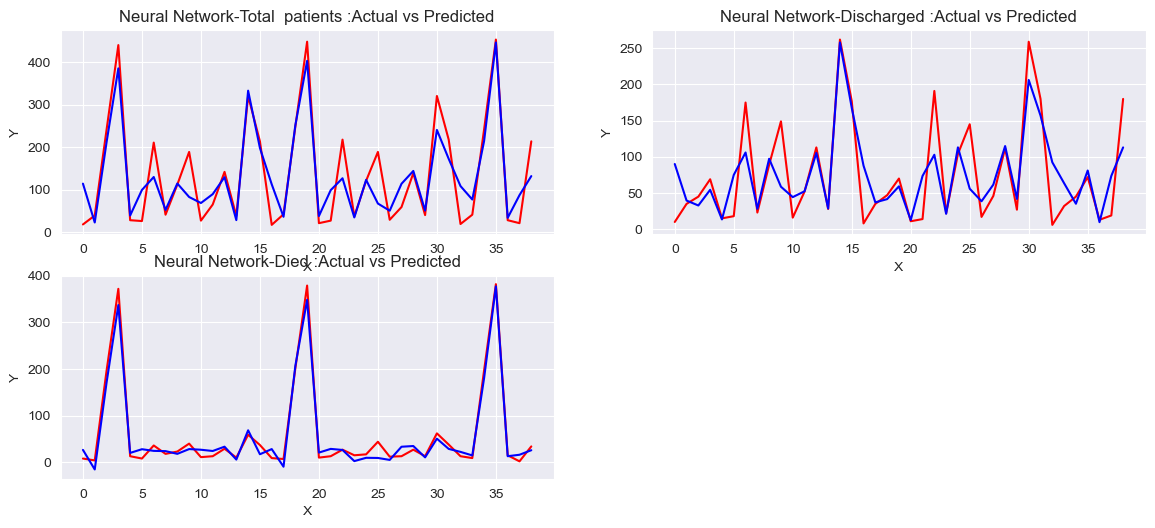

In [30]:
plt.figure(figsize=(14, len(Y.columns) * 3))
for idx, feature in enumerate(Y.columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    plt.plot( s_y_test[feature], label=f"Actual-{feature}", color='red')
    plt.plot(y_pred[feature], label=f"Pred-{feature}", color='blue')
    plt.title(f'Neural Network-{feature} :Actual vs Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    
plt.show()